
# Setup

## Load packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import binom
import itertools
import helpers as hp
import simulations as sims
import importlib
importlib.reload(sims)

plt.style.use('ggplot')

FIG_PATH = "./../../figures/"

In [15]:
# copied and pasted from mathematica
def M(t,p,q):
    return -((2**t*(1 - p)**t*(-1 + 2*p - q))/(1 - 2*p + q))
def B(t,p,q):
    return (2*p*(1 - q)**t)/(-1 + 2*p - q) + (2**(1 + t)*(1 - p)**t*p)/(1 - 2*p + q)
def G(t,p,q):
    return (2**t*q)/(1 + q) - (2*p*(1 - q)**t*q)/((-1 + 2*p - q)*(1 + q)) - (2**t*(1 - p)**t*q)/(1 - 2*p + q)
def Sigma(t,p,q):
    return np.array([[2*p*(1-p)*M(t-1,p,q),2*p*(1-p)*M(t-1,p,q),0],\
                     [2*p*(1-p)*M(t-1,p,q),q*(1-q)*B(t-1,p,q)+2*p*(1-p)*M(t-1,p,q),q*(1-q)*B(t-1,p,q)],\
                    [0,q*(1-q)*B(t-1,p,q),q*(1-q)*B(t-1,p,q)]])
def d(p,q):
    return np.array([[2*(1-p),0,0],[2*p,1-q,0],[0,q,2]])
def L(p,q):
    return np.array([[1,1,1],[0,0,1]])

def Omega(t,p,q):
    Om = Sigma(t,p,q)
    for j in range(1,t-1):
        dp = np.linalg.matrix_power(d(p,q),t-j)
        Om = Om + dp @ Sigma(j,p,q) @ np.transpose(dp)
    return Om

def Omega_bar(t,p,q):
    return L(p,q) @ Omega(t,p,q) @ np.transpose(L(p,q))

# this is the complicated analytical formula for the variance conditioned on 
# the total number of cells
def varGN_theory(t,p,q):
    M = Omega_bar(t,p,q)
    return M[1,1]-M[0,1]**2/M[0,0]


def varGN_theory_nobroken(t,p,q):
    if p>0.5:
        return p/(2*p-1)*(2**t)**(1+np.log(1-p)/np.log(2))
    else:
        return p/(1-2*p)*(2**t)**(2+2*np.log(1-p)/np.log(2))

In [16]:
Omega_bar(10,0.2,0.8)

array([[156313.90878385, 126968.04053044],
       [126968.04053044, 104221.63290982]])

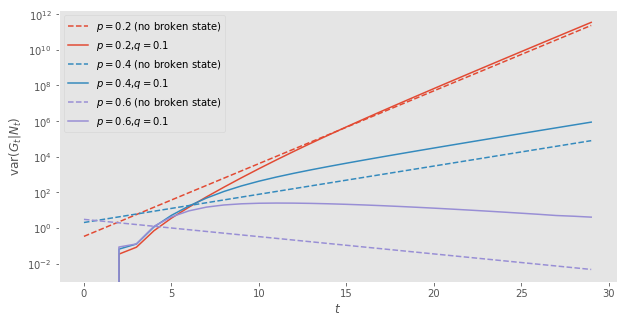

In [25]:
fig,ax = plt.subplots(figsize=(10,5))


ax.semilogy([varGN_theory_nobroken(t,0.2,0.999) for t in range(30)],'C0--',label="$p = 0.2$ (no broken state)")
ax.semilogy([varGN_theory(t,0.2,0.1) for t in range(30)],'C0-',label="$p = 0.2$,$q=0.1$")

ax.semilogy([varGN_theory_nobroken(t,0.4,0.999) for t in range(30)],'C1--',label="$p = 0.4$ (no broken state)")
ax.semilogy([varGN_theory(t,0.4,0.1) for t in range(30)],'C1-',label="$p = 0.4$,$q=0.1$")

ax.semilogy([varGN_theory_nobroken(t,0.6,0.999) for t in range(30)],'C2--',label="$p = 0.6$ (no broken state)")
ax.semilogy([varGN_theory(t,0.6,0.1) for t in range(30)],'C2-',label="$p = 0.6$,$q=0.1$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"${\rm var}(G_t|N_t)$")
ax.grid(False)
ax.legend()
plt.savefig(FIG_PATH+"var_GN_broken_state_theory.pdf",bbox_inches = "tight")

In [156]:
[varGN_theory(t,0.7,0.1) for t in range(50)]

[-0.3500000000000001,
 0.0,
 0.08400000000000002,
 0.11272214530419372,
 1.1173050750009597,
 2.947816341062799,
 4.808254525567918,
 5.920187594383208,
 6.2057352743916,
 5.953737991710113,
 5.435341981883539,
 4.819702080247225,
 4.19827705406351,
 3.61619482957758,
 3.092865625396371,
 2.633865024894476,
 2.2375904470682144,
 1.898979902267456,
 1.611581563949585,
 1.368682861328125,
 1.1638946533203125,
 0.991455078125,
 0.84625244140625,
 0.723876953125,
 0.6201171875,
 0.53515625,
 0.453125,
 0.375,
 0.5,
 1.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [177]:
qs = np.linspace(0,1,100)
ps = np.linspace(0,1,100)
gr = np.zeros((100,100))
for k in range(100):
    for j in range(100):
        v = varGN_theory(40,qs[k],ps[j])
        if v>1:
            gr[k,j] = 1
        else:
            gr[k,j] = 0

/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in matmul
/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/E/anaconda3/lib/python3.7/site-packages/ipykernel_launche

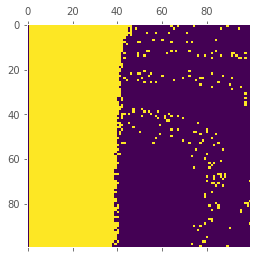

In [178]:
plt.matshow(gr.T)
plt.grid(False)

SyntaxError: invalid syntax (<ipython-input-97-442101a85312>, line 1)